In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
import numpy as np

from mylab.myteststationary import *

## generate a series
### y(t) = 1.005^t + ε(t)

In [23]:
l = []
for i in range(400):
    y = 1.005**i+np.random.standard_normal()*0.3
    l.append(y) 
    
ts = pd.Series(l)
ts.head()

0    0.969947
1    0.534953
2    0.758616
3    0.510163
4    1.039525
dtype: float64

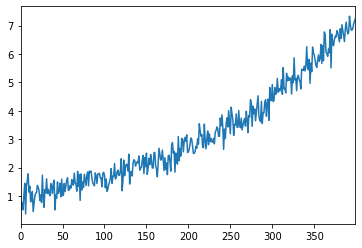

In [24]:
ts.plot()

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp

class DeepAR(tf.keras.models.Model):
    """
    DeepAR 模型
    """
    def __init__(self, lstm_units):
        super().__init__()
        # 注意，文章中使用了多层的 LSTM 网络，为了简单起见，本 demo 只使用一层
        self.lstm = tf.keras.layers.LSTM(lstm_units, return_sequences=True, return_state=True)
        self.dense_mu = tf.keras.layers.Dense(1)
        self.dense_sigma = tf.keras.layers.Dense(1, activation='softplus')

    def call(self, inputs, initial_state=None):
        outputs, state_h, state_c = self.lstm(inputs, initial_state=initial_state)

        mu = self.dense_mu(outputs)
        sigma = self.dense_sigma(outputs)
        state = [state_h, state_c]

        return [mu, sigma, state]
def log_gaussian_loss(mu, sigma, y_true):
    """
    Gaussian 损失函数
    """
    return -tf.reduce_sum(tfp.distributions.Normal(loc=mu, scale=sigma).log_prob(y_true))

In [8]:
train_df = pd.read_csv("temp/train_most_effective_cols.csv")
ts = train_df.down_collectorEmitterVoltage_llr
x = ts.values
y = ts.values

In [9]:
LSTM_UNITS = 16
EPOCHS = 5

# 实例化模型
model = DeepAR(LSTM_UNITS)
# 指定优化器
optimizer = tf.keras.optimizers.Adam()
# 使用 RMSE 衡量误差
rmse = tf.keras.metrics.RootMeanSquaredError()
# 定义训练步def train_step(x, y):
with tf.GradientTape() as tape:
    mu, sigma, _ = model(x)
    loss = log_gaussian_loss(mu, sigma, y)
grads = tape.gradient(loss, model.trainable_variables)
optimizer.apply_gradients(zip(grads, model.trainable_variables))
rmse(y, mu)
# 数据处理（略）# train_data = do_something()
# 训练for epoch in range(EPOCHS):
for x, y in train_data:
    train_step(x, y)
print('Epoch %d, RMSE %.4f' % (epoch + 1, rmse.result()))
rmse.reset_states()

ValueError: in converted code:

    <ipython-input-2-e6529a6a3851>:16 call
        outputs, state_h, state_c = self.lstm(inputs, initial_state=initial_state)
    D:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:619 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    D:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:586 __call__
        self.name)
    D:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:123 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer lstm_1 is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: [359]


In [ ]:
import pandas as pd
# import test_stationarity
train_df = pd.read_csv("temp/train_feature_df_outliers_useful_scale.csv")
ts = train_df.down_collectorEmitterVoltage_llr
ts.index = pd.DatetimeIndex(start=0,periods=len(ts.values),freq='MS')
# ts_log = np.log(ts)
draw_ts(ts)